In [40]:
import os
from openpyxl import load_workbook
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import math

BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath('')))
DATA_DIR = os.path.join(BASE_DIR, 'amerigo_island', 'data')
RAW_DATA_DIR = os.path.join(DATA_DIR, 'raw')
INTERIM_DATA_DIR = os.path.join(DATA_DIR, 'interim')
FINAL_DATA_DIR = os.path.join(DATA_DIR, 'final')

In [41]:
xls_filename = 'Batteries - Full Year Analysis - 200504.xlsm'
input_ws_name = 'BatteryStorage - Summary'
header_col_num = 1

wb = load_workbook(os.path.join(FINAL_DATA_DIR, xls_filename), data_only=True)
input_ws = wb[input_ws_name]

input_ws_vals = [row for row in input_ws.values]
input_ws_headers = input_ws_vals[header_col_num]

battery_df = pd.DataFrame(data= input_ws_vals[header_col_num + 1:], columns= input_ws_headers)

In [56]:
ramp_rate_colname = 'Thermal Prod. Ramp  Rate (MW/h)'
abs_ramp_rate_colname = 'abs_thermal_prod_ramp_rate_mw_h'
battery_df[abs_ramp_rate_colname] = abs(battery_df[ramp_rate_colname])
battery_df[abs_ramp_rate_colname].describe()
battery_df["week"] = battery_df['Date'].map(lambda x: x.week)

In [64]:
weekly_battery_df = battery_df[["week", abs_ramp_rate_colname]].groupby('week').mean()

weekly_battery_df = weekly_battery_df.reset_index()

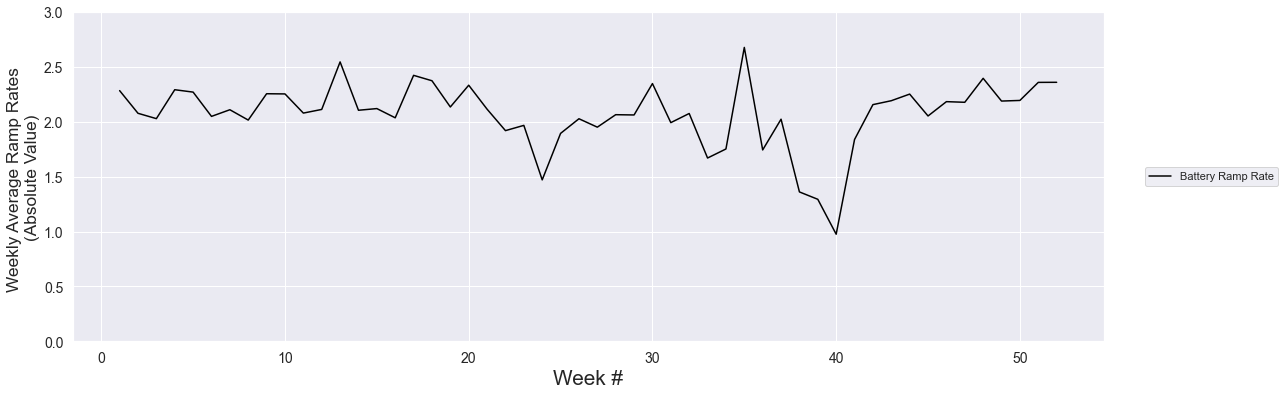

In [72]:
sns.set(rc={'figure.figsize':(18, 6)})
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([0, 3])
plt.plot("week", abs_ramp_rate_colname, label="Battery Ramp Rate", color="black", data=weekly_battery_df)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.ylabel("Weekly Average Ramp Rates \n(Absolute Value)", fontsize="x-large")
plt.xlabel("Week #", fontsize="xx-large")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig.subplots_adjust(top = 0.9, hspace = 0.3)

In [83]:
xls_filename = 'Hydrogen - Full Year Analysis - Submission.xlsx'
input_ws_name = 'Resil Case Full Year H2'
header_col_num = 1

wb = load_workbook(os.path.join(FINAL_DATA_DIR, xls_filename), data_only=True)
input_ws = wb[input_ws_name]

input_ws_vals = [row for row in input_ws.values]
input_ws_headers = input_ws_vals[header_col_num]

h2_df = pd.DataFrame(data= input_ws_vals[header_col_num + 1:], columns= input_ws_headers)

In [85]:
ramp_rate_colname = 'Thermal Prod. Ramp Rate (MW/h)'
abs_ramp_rate_colname = 'abs_thermal_prod_ramp_rate_mw_h'

h2_df = h2_df[['Date', ramp_rate_colname]]
h2_df[abs_ramp_rate_colname] = abs(h2_df[ramp_rate_colname])
h2_df["week"] = h2_df['Date'].map(lambda x: x.week)
h2_df[abs_ramp_rate_colname].describe()

count    8.760000e+03
mean     2.160937e+00
std      3.950403e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.344791e-13
75%      2.500291e+00
max      2.500000e+01
Name: abs_thermal_prod_ramp_rate_mw_h, dtype: float64

In [86]:
weekly_h2_df = h2_df[["week", abs_ramp_rate_colname]].groupby('week').mean()
weekly_h2_df = weekly_h2_df.reset_index()

weekly_h2_df

,week,abs_thermal_prod_ramp_rate_mw_h
0,1.0,2.423351
1,2.0,2.716459
2,3.0,2.477502
3,4.0,2.596553
4,5.0,2.464418
5,6.0,2.376643
6,7.0,2.459792
7,8.0,2.209135
8,9.0,2.602823
9,10.0,2.460694


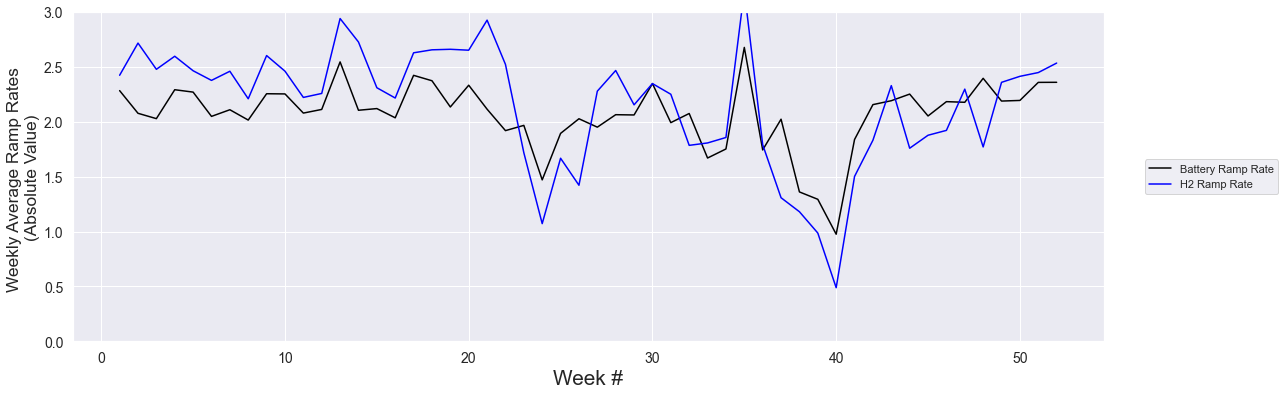

In [87]:
sns.set(rc={'figure.figsize':(18, 6)})
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([0, 3])
plt.plot("week", abs_ramp_rate_colname, label="Battery Ramp Rate", color="black", data=weekly_battery_df)
plt.plot("week", abs_ramp_rate_colname, label="H2 Ramp Rate", color="blue", data=weekly_h2_df)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.ylabel("Weekly Average Ramp Rates \n(Absolute Value)", fontsize="x-large")
plt.xlabel("Week #", fontsize="xx-large")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig.subplots_adjust(top = 0.9, hspace = 0.3)

In [89]:
FULL_RESILIENCE_FILENAME = 'full_resilience_df.csv'
load_and_gen_df = pd.read_csv(os.path.join(FINAL_DATA_DIR, FULL_RESILIENCE_FILENAME))

load_w_transmission_loss_and_load_scale_colname = "load_w_transmission_loss_and_load_scale"
gen_thermal_total_mw_colname = "gen_thermal_total_mw"
battery_final_thermal_prod_mw_colname = "battery_final_thermal_prod_mw"
h2_real_thermal_prod_colname = "h2_real_thermal_prod"

thermal_prod_cols = [
    "load_w_transmission_loss_and_load_scale", # all thermal
    "gen_thermal_total_mw", # no storage w proposed sites
]
load_and_gen_df[thermal_prod_cols]

,load_w_transmission_loss_and_load_scale,gen_thermal_total_mw
0,35.1,33.42
1,35.1,33.87
2,34.6,33.51
3,34.2,32.73
4,33.8,32.68
...,...,...
8755,45.5,38.73
8756,46.5,40.29
8757,45.0,36.27
8758,41.7,34.47


In [90]:
no_vre_ramp_rate_mw_colname = 'no_vre_ramp_rate_mw'
no_storage_ramp_rate_mw_colname = 'no_storage_ramp_rate_mw'

decorated_df = load_and_gen_df.copy()
decorated_df[no_vre_ramp_rate_mw_colname] = None
decorated_df[no_storage_ramp_rate_mw_colname] = None

load_w_transmission_loss_and_load_scale_colname = "load_w_transmission_loss_and_load_scale"
gen_thermal_total_mw_colname = "gen_thermal_total_mw"

for idx, row in decorated_df.iterrows():

    if idx == 0: # First row of data set, so can't take previous hour's values

        no_vre_val, no_storage_val = 0, 0

    else: # Subsequent rows. Has values for previous hour
    
        no_vre_val = abs(decorated_df.loc[idx - 1, load_w_transmission_loss_and_load_scale_colname] - row[load_w_transmission_loss_and_load_scale_colname])
        no_storage_val = abs(decorated_df.loc[idx - 1, gen_thermal_total_mw_colname] - row[gen_thermal_total_mw_colname])
        #batt_val = decorated_df.loc[idx - 1, battery_final_thermal_prod_mw_colname] - row[battery_final_thermal_prod_mw_colname]
        #h2_val = decorated_df.loc[idx - 1, h2_real_thermal_prod_colname] - row[h2_real_thermal_prod_colname]
        
    decorated_df.at[idx, no_vre_ramp_rate_mw_colname] = no_vre_val
    decorated_df.at[idx, no_storage_ramp_rate_mw_colname] = no_storage_val
#     decorated_df.at[idx, battery_ramp_rate_mw_colname] = batt_val
#     decorated_df.at[idx, h2_ramp_rate_mw_colname] = h2_val
    
decorated_df[no_vre_ramp_rate_mw_colname] = decorated_df[no_vre_ramp_rate_mw_colname].astype(float)
decorated_df[no_storage_ramp_rate_mw_colname] = decorated_df[no_storage_ramp_rate_mw_colname].astype(float)
#     decorated_df[battery_ramp_rate_mw_colname] = decorated_df[battery_ramp_rate_mw_colname].astype(float)
#     decorated_df[h2_ramp_rate_mw_colname] = decorated_df[h2_ramp_rate_mw_colname].astype(float)


In [93]:
ramp_rate_cols = [
    no_vre_ramp_rate_mw_colname,
    no_storage_ramp_rate_mw_colname,
]

decorated_df[ramp_rate_cols].describe()

,no_vre_ramp_rate_mw,no_storage_ramp_rate_mw
count,8760.000000,8760.000000
mean,1.396016,4.318294
std,1.347558,4.714479
min,0.000000,0.000000
25%,0.400000,0.830000
50%,1.000000,2.470200
75%,2.100000,6.559350
max,20.700000,31.874500


In [96]:
bau_weekly_df = decorated_df[["week", no_vre_ramp_rate_mw_colname, no_storage_ramp_rate_mw_colname]].groupby('week').mean()

bau_weekly_df = bau_weekly_df.reset_index()
bau_weekly_df

,week,no_vre_ramp_rate_mw,no_storage_ramp_rate_mw
0,1,1.388095,4.758465
1,2,1.343452,4.149625
2,3,1.341667,4.419060
3,4,1.148810,4.096186
4,5,1.237500,4.205460
5,6,1.285714,4.165304
6,7,1.320833,3.942840
7,8,1.282143,3.595463
8,9,1.288095,4.351974
9,10,1.430952,3.886161


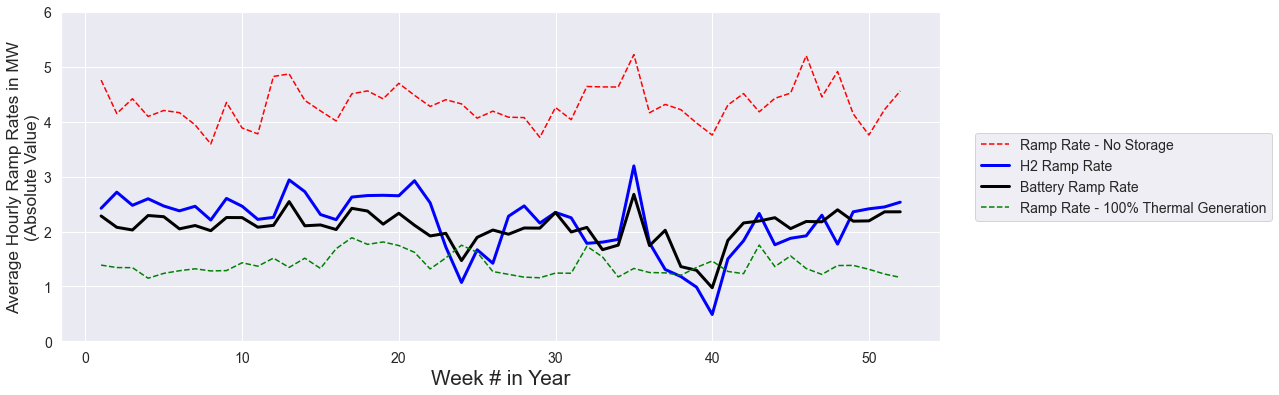

In [110]:
sns.set(rc={'figure.figsize':(18, 6)})
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([0, 6])
plt.plot("week", no_storage_ramp_rate_mw_colname, label="Ramp Rate - No Storage", color="red", linestyle="dashed",data=bau_weekly_df)
plt.plot("week", abs_ramp_rate_colname, label="H2 Ramp Rate", color="blue", linewidth=3, data=weekly_h2_df)
plt.plot("week", abs_ramp_rate_colname, label="Battery Ramp Rate", color="black", linewidth=3 , data=weekly_battery_df)
plt.plot("week", no_vre_ramp_rate_mw_colname, label="Ramp Rate - 100% Thermal Generation", color="green",linestyle="dashed", data=bau_weekly_df)

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, prop={'size': 14})
plt.ylabel("Average Hourly Ramp Rates in MW\n(Absolute Value)", fontsize="x-large")
plt.xlabel("Week # in Year", fontsize="xx-large")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig.subplots_adjust(top = 0.9, hspace = 0.3)

In [17]:
orig_col_list = list(battery_df.columns)
last_col_idx = orig_col_list.index('Balance Check')
cleaned_col_list = list(set(orig_col_list[0:last_col_idx + 1]))

# #battery_df = battery_df[cleaned_col_list]
# battery_df.columns.values[4] = "thermal_prod_baseline_mw"
battery_df.columns

Index([                                      'hour counter',
                                                     'Date',
                                         'Island Load (MW)',
                                         'Island Load (MW)',
                                       'Thermal Prod. (MW)',
                                          'Wind Prod. (MW)',
                                         'Solar Prod. (MW)',
                                           'VRE Prod. (MW)',
                            'Load After Thermal Prod. (MW)',
                               ' Load after VRE Prod. (MW)',
                       'Excess VRE (Post Grid Demand) (MW)',
                                        'Battery SoC (MWh)',
       'Excess VRE (Post Grid Demand +Battery Charge) (MW)',
                                 'Thermal Prod. Delta (MW)',
                                       'Thermal Prod. (MW)',
                          'Thermal Prod. Ramp  Rate (MW/h)',
                        

In [22]:
battery_df_subset = battery_df[['Date','Thermal Prod. (MW)']]
battery_df_subset.columns = ['date', 'baseline_thermal_prod_mw', 'battery_thermal_prod_mw']
battery_df_subset = battery_df_subset.drop('baseline_thermal_prod_mw', axis=1)
battery_df_subset["week"] = battery_df_subset['date'].map(lambda x: x.week)

array([52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51])

In [23]:
def add_ramp_rate_cols(df, input_colname, appended_colname):

    decorated_df = df.copy()
    decorated_df[appended_colname] = None

    for idx, row in decorated_df.iterrows():

        if idx == 0: # First row of data set, so can't take previous hour's values

            ramp_rate_val = 0 

        else: # Subsequent rows. Has values for previous hour

            ramp_rate_val = decorated_df.loc[idx - 1, input_colname] - row[input_colname]

        decorated_df.at[idx, appended_colname] = round(ramp_rate_val, 4)

    decorated_df[appended_colname] = decorated_df[appended_colname].astype(float)

    return decorated_df


In [39]:
battery_ramp_rate_input_colname = 'battery_thermal_prod_mw'
battery_ramp_rate_new_colname = 'battery_thermal_prod_mw_ramp_rate'

battery_df_subset = add_ramp_rate_cols(battery_df_subset, battery_ramp_rate_input_colname, battery_ramp_rate_new_colname)

weekly_battery_df_subset = battery_df_subset.groupby('week').sum()
weekly_battery_df_subset

,battery_thermal_prod_mw,battery_thermal_prod_mw_ramp_rate
week,,
1,4761.088345,2.000000e-04
2,4223.281299,-1.000000e-04
3,4400.065011,-2.000000e-04
4,4075.278913,5.329071e-15
5,3973.398806,-2.000000e-04
6,4134.718368,-1.000000e-04
7,4161.111531,1.387400e+00
8,3704.407331,-1.387300e+00
9,4342.010297,-6.661338e-16


In [34]:
battery_df_subset.head

,date,battery_thermal_prod_mw,week,battery_thermal_prod_mw_ramp_rate
0,2017-01-01 00:00:00.000000,33.0,52,0.0
1,2017-01-01 01:00:00.000000,33.0,52,0.0
2,2017-01-01 02:00:00.000000,33.0,52,0.0
3,2017-01-01 02:59:59.999999,33.0,52,-0.0
4,2017-01-01 03:59:59.999999,33.0,52,0.0
...,...,...,...,...
8755,2017-12-31 18:59:59.998165,33.0,52,0.0
8756,2017-12-31 19:59:59.998165,33.0,52,0.0
8757,2017-12-31 20:59:59.998165,33.0,52,0.0
8758,2017-12-31 21:59:59.998165,33.0,52,0.0


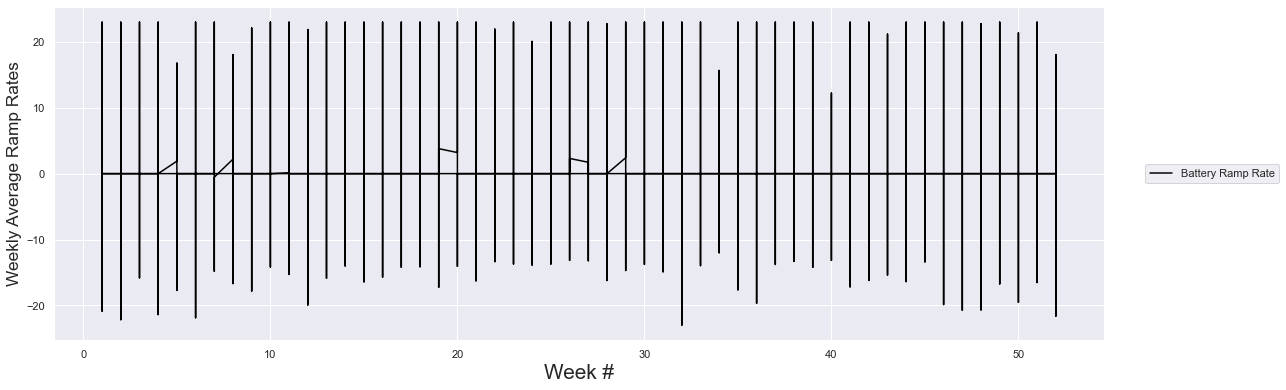

In [31]:
sns.set(rc={'figure.figsize':(18, 6)})
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
# subplot.set_ylim([-13,13])
plt.plot("week", battery_ramp_rate_new_colname, label="Battery Ramp Rate", color="black", data=battery_df_subset)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.ylabel("Weekly Average Ramp Rates", fontsize="x-large")
plt.xlabel("Week #", fontsize="xx-large")
plt.tight_layout()
fig.subplots_adjust(top = 0.9, hspace = 0.3)